##California housing price predictor (Regression)

*The 8 input features are the following:*

**MedInc:** median income in block group

**HouseAge:** median house age in block group

**AveRooms:** average number of rooms per household

**AveBedrms:** average number of bedrooms per household

**Population:** block group population

**AveOccup:** average number of household members

**Latitude:** block group latitude

**Longitude:** block group longitude

*The target variable is a scalar: the median house value for California districts, in dollars.*


# 1. Import Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 2. Load and Explore the Data

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Fetch the California housing dataset
housing = fetch_california_housing()

# Split the dataset into full training and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
# Further split the full training set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [3]:
# Display the number of samples in full training set samples
len(X_train_full)

15480

In [4]:
# Display the number of samples in test set samples
len(X_test)

5160

In [5]:
# Display the number of samples in validation set samples
len(X_valid)

3870

In [6]:
# Display the number of samples in training set samples
len(X_train)

11610

In [8]:
# Convert X_train into a DataFrame with attribute names
df_train = pd.DataFrame(X_train, columns=housing.feature_names)

# Print the DataFrame
df_train.head()  # Print the first few rows of the DataFrame


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,3.5214,15.0,3.049945,1.106548,1447.0,1.605993,37.63,-122.43
1,5.3275,5.0,6.490060,0.991054,3464.0,3.443340,33.69,-117.39
2,3.1000,29.0,7.542373,1.591525,1328.0,2.250847,38.44,-122.98
3,7.1736,12.0,6.289003,0.997442,1054.0,2.695652,33.55,-117.70
4,2.0549,13.0,5.312457,1.085092,3297.0,2.244384,33.93,-116.93


# 3. Data Preprocessing

In [9]:
# Standardize the feature values for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Fit on training data and transform it
X_valid = scaler.transform(X_valid) # Transform validation data
X_test = scaler.transform(X_test) # Transform test data

In [11]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# 4. Build the Neural Network Model

In [16]:
# Create a Sequential model with one hidden layer
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1) # Output layer for regression (predicting a continuous value)
])

# Compile the model with Mean Squared Error loss and SGD optimizer
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 5. Train the Model

In [17]:
# Train the model for 20 epochs using the training set and validate on the validation set
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2768 - val_loss: 4.1009
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9254 - val_loss: 1.0436
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7553 - val_loss: 0.6802
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7022 - val_loss: 0.6184
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6666 - val_loss: 0.5917
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6364 - val_loss: 0.5674
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6103 - val_loss: 0.5440
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5869 - val_loss: 0.5248
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5662 - val_loss: 0.5070
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5479 - val_loss: 0.4897
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5319 - val_loss: 0.4753
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

# 6. Visualize Training Progress

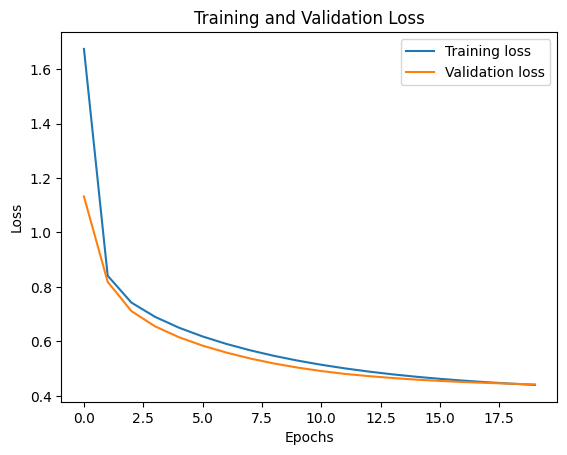

In [13]:
# Plot the loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

# 7. Evaluate the Model

In [18]:
# Evaluate the model on the test set
mse_test = model.evaluate(X_test, y_test)
mse_test

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4375


0.4333426058292389

# 8. Make Predictions and Compare with Actual Values

In [15]:

# Make predictions on new data
X_new = X_test[:3]
y_pred = model.predict(X_new)

# Compare predictions with actual values
for i in range(len(X_new)):
    print(f"Sample {i+1}:")
    print(f"Predicted: {y_pred[i][0]}")
    print(f"Actual: {y_test[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Sample 1:
Predicted: 0.5257769823074341
Actual: 0.477
Sample 2:
Predicted: 1.6698254346847534
Actual: 0.458
Sample 3:
Predicted: 3.208404779434204
Actual: 5.00001


# Summary

In this project, we built a regression model using TensorFlow and Keras to predict California housing prices. The target variable is the median house value for California districts, and the model utilizes 8 input features including median income, house age, average number of rooms and bedrooms, population, average occupancy, latitude, and longitude.

### Key Steps:

1. **Data Loading and Exploration:**
   - The California Housing dataset was fetched and split into training, validation, and test sets.
   - The training data was converted into a DataFrame for a quick overview of the features.

2. **Data Preprocessing:**
   - Standardization of the input features was performed using `StandardScaler` to ensure that all features have a similar scale, which is crucial for effective model training.

3. **Model Building:**
   - A Sequential neural network was built with one hidden layer consisting of 30 neurons and ReLU activation.
   - The output layer was designed with a single neuron to predict the continuous target value.

4. **Training the Model:**
   - The model was compiled with Mean Squared Error (MSE) as the loss function and stochastic gradient descent (SGD) as the optimizer.
   - It was trained for 20 epochs with both training and validation data, and the progress was visualized by plotting the loss curves.

5. **Evaluation and Prediction:**
   - The model was evaluated on the test set, achieving a Test MSE of approximately 0.4333.
   - Predictions were made on a few test samples and compared with the actual target values, demonstrating the model's performance.

This project provides a complete end-to-end example of building, training, and evaluating a regression model using deep learning techniques.
